# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### Imports

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
%matplotlib inline
sns.set_style('whitegrid')

/Users/ianreynolds/Desktop/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

### Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America - BAC
* CitiGroup - C
* Goldman Sachs - GS
* JPMorgan Chase - JPM
* Morgan Stanley - MS
* Wells Fargo - WFC

### API Key = GV890U7L5C4E2YNY

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
import os
from datetime import datetime
import pandas_datareader.data as web
os.environ['ALPHAVANTAGE_API_KEY'] = 'GV890U7L5C4E2YNY'

In [5]:
BAC_data = web.DataReader("BAC", "av-daily", start=datetime(2006, 1, 1),end=datetime(2016, 1, 1))

In [6]:
C_data = web.DataReader("C", "av-daily", start=datetime(2006, 1, 1),end=datetime(2016, 1, 1))

In [7]:
GS_data = web.DataReader("GS", "av-daily", start=datetime(2006, 1, 1),end=datetime(2016, 1, 1))

In [8]:
JPM_data = web.DataReader("JPM", "av-daily", start=datetime(2006, 1, 1),end=datetime(2016, 1, 1))

In [9]:
MS_data = web.DataReader("MS", "av-daily", start=datetime(2006, 1, 1),end=datetime(2016, 1, 1))

In [12]:
WFC_data = web.DataReader("WFC", "av-daily", start=datetime(2006, 1, 1),end=datetime(2016, 1, 1))

In [13]:
bank_stocks = pd.concat([BAC_data,C_data,GS_data,JPM_data,MS_data,WFC_data],keys=tickers,axis=1)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [14]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

### Exploratory Data Analysis

** What is the max Close price for each bank's stock throughout the time period?**

In [15]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** New df for returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [16]:
pct_returns = pd.DataFrame()

In [17]:
for tick in tickers:
    pct_returns[tick] = bank_stocks[tick]['close'].pct_change()

In [18]:
pct_returns.head()

,BAC,C,GS,JPM,MS,WFC
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


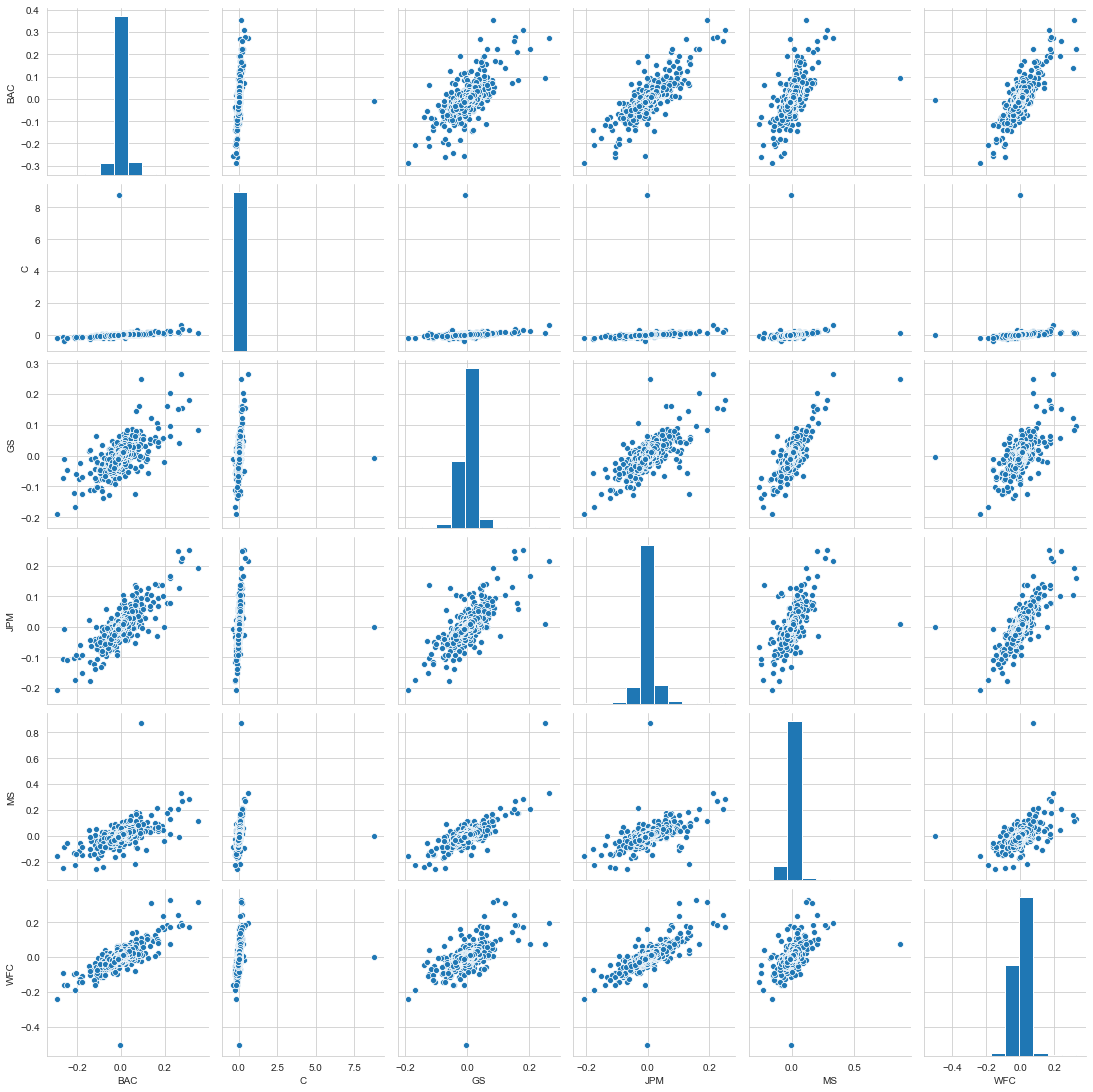

In [19]:
sns.pairplot(pct_returns[1:])

** What dates each bank stock had the best and worst single day returns. **

In [20]:
print(pct_returns.min())
print('')
print(pct_returns.idxmin())

BAC   -0.289694
C     -0.390244
GS    -0.189596
JPM   -0.207274
MS    -0.258929
WFC   -0.502084
dtype: float64

BAC    2009-01-20
C      2009-02-27
GS     2009-01-20
JPM    2009-01-20
MS     2008-10-09
WFC    2006-08-14
dtype: object


In [21]:
print(pct_returns.max())
print('')
print(pct_returns.idxmax())

BAC    0.352691
C      8.769912
GS     0.264678
JPM    0.250967
MS     0.869835
WFC    0.327645
dtype: float64

BAC    2009-04-09
C      2011-05-09
GS     2008-11-24
JPM    2009-01-21
MS     2008-10-13
WFC    2008-07-16
dtype: object


* Jan 20, 2009 - Obama inaguration
* May 9, 2011 - Citi split

In [22]:
print(pct_returns.std())

BAC    0.036617
C      0.179065
GS     0.025357
JPM    0.027651
MS     0.037831
WFC    0.031841
dtype: float64


In [23]:
pct_returns.loc['2015-01-01':'2016:01:01'].std()

BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

Text(0.5, 1.0, 'Morgan Stanley 2015 Returns')

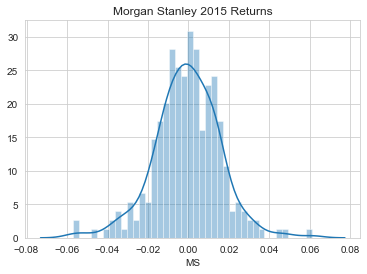

In [24]:
sns.distplot(pct_returns.loc['2015-01-01':'2016:01:01']['MS'],bins=40)
plt.title('Morgan Stanley 2015 Returns')

Text(0.5, 1.0, 'Citi 2008 Returns')

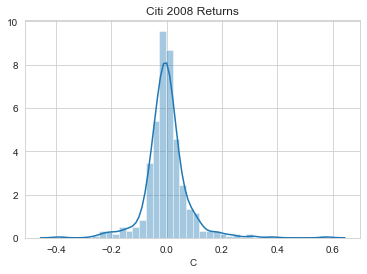

In [25]:
sns.distplot(pct_returns.loc['2008-01-01':'2009:01:01']['C'],bins=40)
plt.title('Citi 2008 Returns')

### Overall Visualization

Lineplot of entire time range

In [26]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot(kind='scatter',xTitle='Date',yTitle='Closing Price (USD)')

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

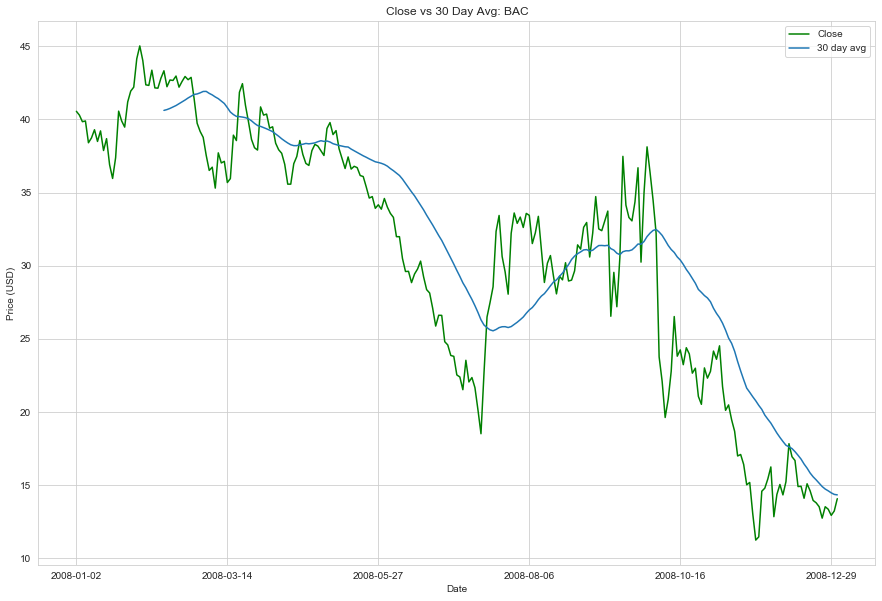

In [27]:
plt.figure(figsize=(15,10))
bank_stocks['BAC']['close'].loc['2008-01-01':'2009-01-01'].plot(label='Close',color='g')
bank_stocks['BAC']['close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day avg')
plt.title('Close vs 30 Day Avg: BAC')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

** Heatmap of the correlation between the stocks Close Price.**

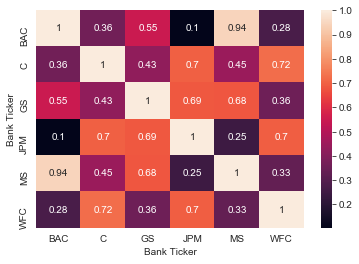

In [28]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

In [29]:
BAC_data[['open', 'high', 'low', 'close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')